In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import itertools
from collections import Counter
import re
import string


import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from time import time

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cutestuff/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cutestuff/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cutestuff/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
meg_dailymail = pd.read_csv('meg_dailymail2.csv', index_col=0)
meg_express = pd.read_csv('meg_express2.csv', index_col=0)
meg_thesun = pd.read_csv('meg_thesun2.csv', index_col=0)

In [3]:
meg_articles = pd.concat([meg_dailymail, meg_express, meg_thesun])

In [4]:
meg_articles

,news_source,date,headline,url
0,DailyMail,2021,Harry and Meghan confirm they DID buy 'Lilibet...,https://www.dailymail.co.uk/news/article-97114...
1,DailyMail,2021,Meghan is ready for 'brutal showdown' with Buc...,https://www.dailymail.co.uk/news/article-97115...
2,DailyMail,2021,Kate and Prince William did NOT talk to Prince...,https://www.dailymail.co.uk/news/article-97104...
3,DailyMail,2021,Did Meghan Markle cut a royal visit short over...,https://www.dailymail.co.uk/news/article-97102...
4,DailyMail,2021,Courtney Stodden 'wants to appear on Chrissy T...,https://www.dailymail.co.uk/tvshowbiz/article-...
...,...,...,...,...
4092,TheSun,2018,Meghan Markle's Suits co-stars reveal pics fro...,https://www.thesun.co.uk/tvandshowbiz/6333417/...
4093,TheSun,2018,Meghan dazzles in Stella McCartney dress & Dia...,https://www.thesun.co.uk/fabulous/6330751/megh...
4094,TheSun,2018,Moment Meghan Markle spots her old teacher in ...,https://www.thesun.co.uk/news/6332952/meghan-m...
4095,TheSun,2018,Meghan's family celebrate Royal Wedding in BUR...,https://www.thesun.co.uk/news/6333254/meghan-m...


In [5]:
meg_articles.reset_index(inplace=True,drop= True)

In [6]:
meg_articles

,news_source,date,headline,url
0,DailyMail,2021,Harry and Meghan confirm they DID buy 'Lilibet...,https://www.dailymail.co.uk/news/article-97114...
1,DailyMail,2021,Meghan is ready for 'brutal showdown' with Buc...,https://www.dailymail.co.uk/news/article-97115...
2,DailyMail,2021,Kate and Prince William did NOT talk to Prince...,https://www.dailymail.co.uk/news/article-97104...
3,DailyMail,2021,Did Meghan Markle cut a royal visit short over...,https://www.dailymail.co.uk/news/article-97102...
4,DailyMail,2021,Courtney Stodden 'wants to appear on Chrissy T...,https://www.dailymail.co.uk/tvshowbiz/article-...
...,...,...,...,...
20397,TheSun,2018,Meghan Markle's Suits co-stars reveal pics fro...,https://www.thesun.co.uk/tvandshowbiz/6333417/...
20398,TheSun,2018,Meghan dazzles in Stella McCartney dress & Dia...,https://www.thesun.co.uk/fabulous/6330751/megh...
20399,TheSun,2018,Moment Meghan Markle spots her old teacher in ...,https://www.thesun.co.uk/news/6332952/meghan-m...
20400,TheSun,2018,Meghan's family celebrate Royal Wedding in BUR...,https://www.thesun.co.uk/news/6333254/meghan-m...


In [7]:
kate_dailymail = pd.read_csv('kate_dailymail2.csv', index_col=0)
kate_express = pd.read_csv('kate_express2.csv', index_col=0)
kate_thesun = pd.read_csv('kate_thesun2.csv', index_col=0)

In [8]:
kate_articles = pd.concat([kate_dailymail, kate_express, kate_thesun])

In [9]:
kate_articles.reset_index(inplace=True,drop= True)

In [10]:
kate_articles

,news_source,date,headline,url
0,DailyMail,2021,Kate 'will help Princes William and Harry put ...,https://www.dailymail.co.uk/news/article-97144...
1,DailyMail,2021,Dressed down Duchess! Casual Kate Middleton do...,https://www.dailymail.co.uk/galleries/article-...
2,DailyMail,2021,Kate the beekeeper brings youngsters a pot of ...,https://www.dailymail.co.uk/wires/pa/article-9...
3,DailyMail,2021,Casual Kate! Duchess of Cambridge dresses down...,https://www.dailymail.co.uk/femail/article-971...
4,DailyMail,2021,Kate and Prince William did NOT talk to Prince...,https://www.dailymail.co.uk/news/article-97104...
...,...,...,...,...
12392,TheSun,2016,Kate Middleton dazzles in a cobalt gown at a b...,https://www.thesun.co.uk/news/1259940/kate-mid...
12393,TheSun,2016,Male stripper performs in front of pupils as y...,https://www.thesun.co.uk/news/1218955/male-str...
12394,TheSun,2016,Kate Middleton recycles outfit for annual Buck...,https://www.thesun.co.uk/tvandshowbiz/1202793/...
12395,TheSun,2016,Spot the difference: Royal princess seen walki...,https://www.thesun.co.uk/news/1198123/spot-the...


In [11]:
meg_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20402 entries, 0 to 20401
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   news_source  20402 non-null  object
 1   date         20402 non-null  int64 
 2   headline     20402 non-null  object
 3   url          20402 non-null  object
dtypes: int64(1), object(3)
memory usage: 637.7+ KB


In [12]:
meg_articles['date'].astype(int)

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
20397    2018
20398    2018
20399    2018
20400    2018
20401    2018
Name: date, Length: 20402, dtype: int64

In [13]:
kate_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   news_source  12397 non-null  object
 1   date         12397 non-null  int64 
 2   headline     12397 non-null  object
 3   url          12397 non-null  object
dtypes: int64(1), object(3)
memory usage: 387.5+ KB


In [14]:
kate_articles['date'].astype(int)

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
12392    2016
12393    2016
12394    2016
12395    2016
12396    2016
Name: date, Length: 12397, dtype: int64

# LABELLING 

In [15]:
meg_train, meg_test = train_test_split(meg_articles, stratify=meg_articles['news_source'], test_size=0.95, random_state=42)

In [16]:
kate_train, kate_test = train_test_split(kate_articles, stratify=kate_articles['news_source'], test_size=0.95, random_state=42)

In [17]:
meg_train

,news_source,date,headline,url
19577,TheSun,2018,Secrets of Meghan's ‘20-strong childbirth team...,https://www.thesun.co.uk/fabulous/7607630/megh...
6023,DailyMail,2017,Meghan Markle's Aussie connection: How Prince ...,https://www.dailymail.co.uk/tvshowbiz/article-...
10725,Express,2019,Revealed: The vile trolls carrying out online ...,https://www.express.co.uk/news/royal/1067187/r...
8627,Express,2021,Prince Harry to leave Meghan two weeks after d...,https://www.express.co.uk/news/royal/1446587/P...
4722,DailyMail,2018,Prince Harry and Meghan 'in floods of tears' d...,https://www.dailymail.co.uk/news/article-57469...
...,...,...,...,...
8972,Express,2021,Royal Family race row: Actor Daniel Kaluuya la...,https://www.express.co.uk/celebrity-news/14188...
11648,Express,2019,Meghan Markle BOMBSHELL: How first meeting wit...,https://www.express.co.uk/news/royal/1099032/m...
3411,DailyMail,2019,'She's probably going to be held back': Lisa W...,https://www.dailymail.co.uk/tvshowbiz/article-...
14511,Express,2018,WWE news: Carmella takes swipe at Meghan Markl...,https://www.express.co.uk/sport/othersport/957...


In [18]:
lab = pd.concat([meg_train, kate_train])

In [19]:
lab.reset_index(inplace=True,drop= True)

In [20]:
len(lab)

1639

In [21]:
lab

,news_source,date,headline,url
0,TheSun,2018,Secrets of Meghan's ‘20-strong childbirth team...,https://www.thesun.co.uk/fabulous/7607630/megh...
1,DailyMail,2017,Meghan Markle's Aussie connection: How Prince ...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,Express,2019,Revealed: The vile trolls carrying out online ...,https://www.express.co.uk/news/royal/1067187/r...
3,Express,2021,Prince Harry to leave Meghan two weeks after d...,https://www.express.co.uk/news/royal/1446587/P...
4,DailyMail,2018,Prince Harry and Meghan 'in floods of tears' d...,https://www.dailymail.co.uk/news/article-57469...
...,...,...,...,...
1634,Express,2011,Prince William and Kate Middleton off to Canada,https://www.express.co.uk/news/uk/229531/Princ...
1635,TheSun,2019,Safe Kate buys same outfits to keep ‘elegant s...,https://www.thesun.co.uk/fabulous/8540828/safe...
1636,Express,2017,Kate Middleton vs Meghan Markle: Who would YOU...,https://www.express.co.uk/life-style/life/8574...
1637,Express,2018,"Royally AWKWARD: The moments Kate, Meghan and ...",https://www.express.co.uk/news/royal/1021113/k...


In [178]:
lab['label'] = 1

In [23]:
negative_headlines = [2, 9, 18, 20, 25, 28, 38, 39, 46, 47, 50, 51, 58, 72, 73, 78, 79, 80, 81, 90, 97, 105, 106, 108, 109, 112, 114, 118, 119, 124, 128, 137, 142, 145, 151, 155, 158, 159, 160, 165, 166,168, 169, 171, 174, 179, 183, 196, 197, 204, 205, 206, 213, 216, 224, 232, 233, 234, 247, 248, 254, 256, 261, 263, 266, 270, 271, 272, 278, 287, 294, 301, 306, 308, 309, 311, 312, 315, 316, 329, 330, 338, 355, 358, 378, 383, 387, 389, 391, 392, 394, 407, 422, 438, 479, 481, 486, 487, 488, 492, 493, 497, 513, 519, 520, 524, 525, 526, 533, 574, 577, 585, 588, 589, 591, 598, 603, 605, 608, 611, 612, 615, 616, 618, 622, 629, 632, 633, 634, 640, 646, 647, 653, 657, 658, 667, 674, 675, 682, 684, 685, 691, 698, 717, 723, 730, 733, 735, 736, 740, 741, 742, 751, 756, 757, 762, 763, 768, 770, 771, 780, 787, 788, 789, 804, 805, 809, 810, 811, 814, 828, 833, 845, 852, 856, 865, 868, 869, 870, 875, 880, 881, 886, 889, 891, 898, 899, 902, 903, 906, 907, 908, 911, 915, 923, 925, 928, 932, 935, 936, 937, 939, 940, 942, 947, 956, 957, 963, 969, 972, 973, 986, 990, 994, 996, 1000, 1003,  1011, 1019, 1021, 1030, 1042, 1051, 1052, 1054, 1057, 1074, 1083, 1087, 1128, 1204, 1205, 1231, 1233, 1249, 1266, 1282, 1294, 1297, 1327, 1339, 1353, 1358, 1370, 1391, 1392, 1402, 1411, 1412, 1417, 1422, 1441, 1450, 1477, 1486, 1487, 1498, 1499, 1522, 1523, 1529, 1530, 1544, 1553, 1557, 1564, 1568, 1571, 1576, 1578, 1581, 1591, 1592, 1596, 1598, 1607, 1616, 1617, 1619]

In [72]:
len(negative_headlines)

279

In [179]:
for i in negative_headlines:
    lab['label'][i] = 0

<ipython-input-179-d508a0980ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab['label'][i] = 0


In [25]:
lab

,news_source,date,headline,url,label
0,TheSun,2018,Secrets of Meghan's ‘20-strong childbirth team...,https://www.thesun.co.uk/fabulous/7607630/megh...,1
1,DailyMail,2017,Meghan Markle's Aussie connection: How Prince ...,https://www.dailymail.co.uk/tvshowbiz/article-...,1
2,Express,2019,Revealed: The vile trolls carrying out online ...,https://www.express.co.uk/news/royal/1067187/r...,0
3,Express,2021,Prince Harry to leave Meghan two weeks after d...,https://www.express.co.uk/news/royal/1446587/P...,1
4,DailyMail,2018,Prince Harry and Meghan 'in floods of tears' d...,https://www.dailymail.co.uk/news/article-57469...,1
...,...,...,...,...,...
1634,Express,2011,Prince William and Kate Middleton off to Canada,https://www.express.co.uk/news/uk/229531/Princ...,1
1635,TheSun,2019,Safe Kate buys same outfits to keep ‘elegant s...,https://www.thesun.co.uk/fabulous/8540828/safe...,1
1636,Express,2017,Kate Middleton vs Meghan Markle: Who would YOU...,https://www.express.co.uk/life-style/life/8574...,1
1637,Express,2018,"Royally AWKWARD: The moments Kate, Meghan and ...",https://www.express.co.uk/news/royal/1021113/k...,1


# MODELS

In [26]:
train, test = train_test_split(lab, test_size=0.2, random_state=420) 

### CLEANING 

In [27]:
p_stemmer = PorterStemmer()
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(string.punctuation)

In [ ]:
stpwrd

In [29]:
def regex_clean(txt, regex):
    return " ".join(re.sub(regex, "", txt).split())

In [30]:
def prep_data(headline):
    
    ## Pre Token Cleaning - Stuff that applies to a string.
    
    headline = headline.lower() 
    headline = regex_clean(headline, r'\s\d+\s')
    headline = regex_clean(headline, r'\d+')

    ## Go-Go-Token-Rangers
    headline = word_tokenize(headline)

    ## Post Token Cleaning - Stuff that applies to a list 
    headline = [p_stemmer.stem(word) for word in headline]
    headline = [p_stemmer.stem(word) for word in headline if word not in stpwrd]
    
    return headline

In [156]:
train_headline = [" ".join(prep_data(x)) for x in train['headline']]

In [157]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000,
                             ngram_range = (1, 3))

In [158]:
train_features = vectorizer.fit_transform(train_headline)

In [159]:
train_features = train_features.toarray()

In [160]:
y_train = train['label'].values

## LOGISTIC REGRESSION

In [161]:
lr = LogisticRegression()

In [162]:
lr.fit(train_features, y_train)

LogisticRegression()

### MODEL PERFORMANCE

In [171]:
from sklearn.metrics import (confusion_matrix, accuracy_score) 
def produce_confusion(positive_label, negative_label, cut_off, y_pred_name, y_real_name):
    
    #Build the CM
    cm = confusion_matrix(y_real_name, np.where(y_pred_name > cut_off , 1, 0))  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

In [172]:
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")

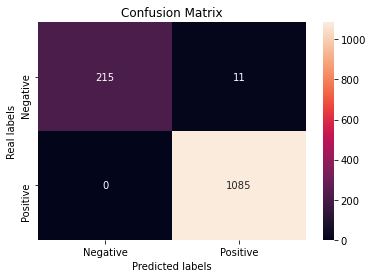

In [180]:
produce_confusion('Positive','Negative', 0.6, lr.predict(train_features), y_train)

In [174]:
apr(lr.predict(train_features), y_train)

Accuracy: 0.9916094584286804
Precision: 0.989963503649635
Recall: 1.0
F1: 0.994956441999083


#### TEST DATA

In [165]:
test_headline = [" ".join(prep_data(x)) for x in test['headline']]

In [166]:
test_features = vectorizer.transform(test_headline)

In [167]:
test_features = test_features.toarray()

In [168]:
y_test = test['label'].values

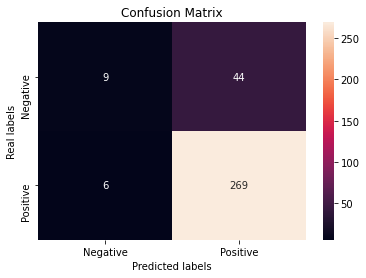

In [181]:
produce_confusion('Positive', 'Negative', 0.6, lr.predict(test_features), y_test)

In [176]:
apr(lr.predict(test_features), y_test)

Accuracy: 0.8475609756097561
Precision: 0.8594249201277955
Recall: 0.9781818181818182
F1: 0.9149659863945578


## SUPPORT VECTOR MACHINES

In [73]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn import datasets

from sklearn.model_selection import GridSearchCV


In [79]:
svm = SVC(gamma=1
              , kernel='rbf'
              , C=1)

svm.fit(train_features, y_train)

SVC(C=1, gamma=1)

In [81]:
apr(svm.predict(train_features), y_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [96]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'],'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, 
                   ]

In [97]:
model = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')

In [100]:
model.fit(train_features, y_train)

 Time in seconds: 608.1477880477905


In [101]:
model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [147]:
apr(model.predict(test_features), y_test)

Accuracy: 0.8475609756097561
Precision: 0.848297213622291
Recall: 0.9963636363636363
F1: 0.9163879598662208


## DECISION TREES

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [113]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(train_features, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [114]:
treeclf.classes_

array([0, 1])

In [148]:
apr(treeclf.predict(train_features), y_train)

Accuracy: 0.8405797101449275
Precision: 0.8520900321543409
Recall: 0.9769585253456221
F1: 0.9102619149849721


In [116]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [3, 5, 7, 10],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'accuracy')

In [117]:
grid.fit(train_features, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
 Time in seconds: 221.37734293937683


In [118]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [119]:
grid.best_score_

0.8321916814210664

In [120]:
dt = DecisionTreeClassifier(max_depth = 3,
                            min_samples_split = 5,
                            min_samples_leaf = 6
                           )

In [121]:
dt.fit(train_features, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=5)

In [149]:
apr(dt.predict(train_features), y_train)

Accuracy: 0.8382913806254767
Precision: 0.8375870069605569
Recall: 0.9981566820276497
F1: 0.9108494533221194


In [150]:
apr(dt.predict(test_features), y_test)

Accuracy: 0.8353658536585366
Precision: 0.8463949843260188
Recall: 0.9818181818181818
F1: 0.9090909090909092


## CLUSTERING

In [104]:
from sklearn import datasets
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()
scaler.fit(train_features)

train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [106]:
errors = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features, y_train)
    pred_i = knn.predict(test_features)
    errors.append(np.mean(pred_i != y_test))

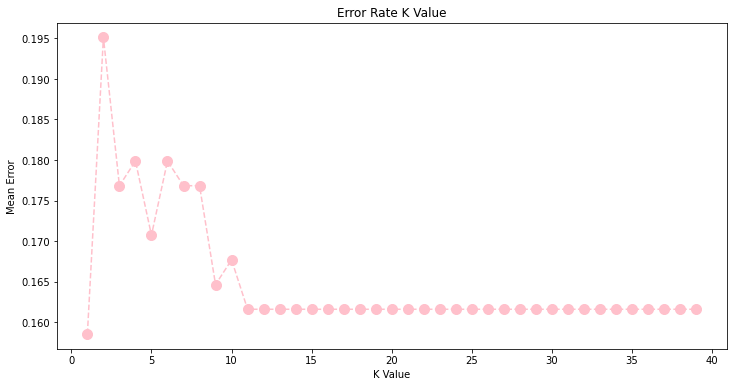

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40)
         , errors
         , color='pink'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='pink'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [108]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_features, y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
y_pred = classifier.predict(test_features)

In [151]:
apr(classifier.predict(test_features), y_test)

Accuracy: 0.8414634146341463
Precision: 0.8495297805642633
Recall: 0.9854545454545455
F1: 0.9124579124579124


## FEATURE IMPORTANCE

In [198]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [199]:
importance = get_most_important_features(vectorizer, lr, 10)

In [200]:
importance

{0: {'tops': [(0.6346806798296419, 'could'),
   (0.635536432605361, 'children'),
   (0.6784660702765036, 'diana'),
   (0.6796591430407091, 'babi'),
   (0.6853086833392864, 'princess'),
   (0.7000326203559257, 'friend'),
   (0.706535927311568, 'meghan kate'),
   (0.7571596080291014, 'follow'),
   (0.7686618423579115, 'visit'),
   (0.7804521923232923, 'reveal')],
  'bottom': [(-0.8873713642901523, 'princ william'),
   (-0.9135985861194083, 'snub'),
   (-0.9335560743280086, 'close'),
   (-1.005623156473692, 'broke'),
   (-1.0080347810660986, 'pair'),
   (-1.0313879380656577, 'blast'),
   (-1.1170488918371528, 'claim'),
   (-1.3206059654137594, 'troll'),
   (-1.3457563283588339, 'attack'),
   (-1.8561885181577154, 'public')]}}

In [209]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5, color='pink')
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5, color='pink')
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

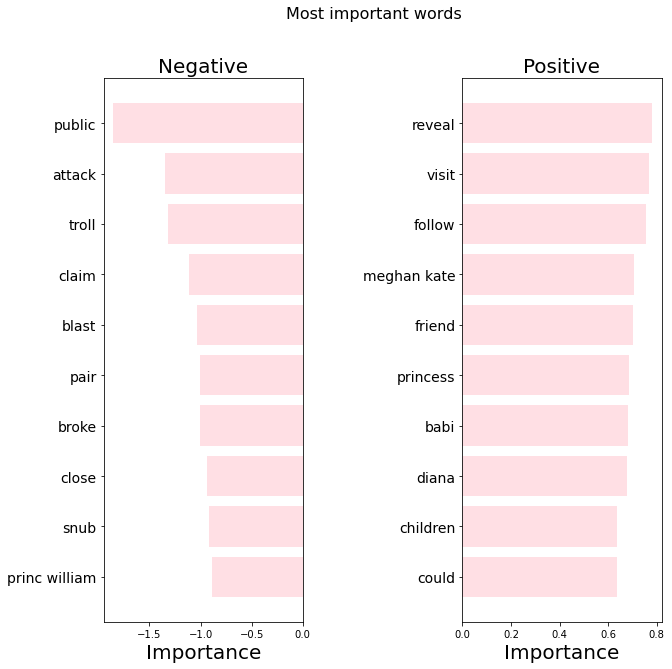

In [210]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")

# PREDICTING THE WHOLE DATA

## MEGHAN MARKLE 

In [184]:
meg_headline = [" ".join(prep_data(x)) for x in meg_articles['headline']]

In [185]:
meg_features = vectorizer.transform(meg_headline)

In [186]:
meg_features = meg_features.toarray()

In [187]:
meg_articles['prediction'] = lr.predict(meg_features)

In [188]:
meg_articles['prediction'].value_counts()

1    18821
0     1581
Name: prediction, dtype: int64

In [195]:
meg_articles[meg_articles['prediction'] == 0]

,news_source,date,headline,url,prediction
1,DailyMail,2021,Meghan is ready for 'brutal showdown' with Buc...,https://www.dailymail.co.uk/news/article-97115...,0
5,DailyMail,2021,Meghan and Prince Harry's son Archie can wait ...,https://www.dailymail.co.uk/news/article-97070...,0
8,DailyMail,2021,'Hurt William threw Harry out': Royal author r...,https://www.dailymail.co.uk/news/article-97056...,0
11,DailyMail,2021,William 'threw Harry out after Meghan bullying...,https://www.dailymail.co.uk/news/article-97026...,0
21,DailyMail,2021,Prince Harry and Meghan Markle want to hire br...,https://www.dailymail.co.uk/femail/article-968...,0
...,...,...,...,...,...
20298,TheSun,2018,Meghan has 'become more comfortable' since mee...,https://www.thesun.co.uk/fabulous/6361966/megh...,0
20314,TheSun,2018,Meghan wears bridal-style outfit and bizarre w...,https://www.thesun.co.uk/fabulous/6352739/megh...,0
20344,TheSun,2018,Public gushes over Meghan and Harry in their o...,https://www.thesun.co.uk/news/6342997/royal-we...,0
20348,TheSun,2018,Paul Burrell warns Meghan is 'everything the R...,https://www.thesun.co.uk/news/6339940/paul-bur...,0


## KATE MIDDLETON

In [189]:
kate_headline = [" ".join(prep_data(x)) for x in kate_articles['headline']]

In [190]:
kate_features = vectorizer.transform(kate_headline)

In [191]:
kate_features = kate_features.toarray()

In [193]:
kate_articles['prediction'] = lr.predict(kate_features)

In [194]:
kate_articles['prediction'].value_counts()

1    12123
0      274
Name: prediction, dtype: int64

In [196]:
kate_articles[kate_articles['prediction'] == 0]

,news_source,date,headline,url,prediction
33,DailyMail,2021,Kate Middleton has 'risen above' claims she ma...,https://www.dailymail.co.uk/femail/article-963...,0
36,DailyMail,2021,How Kate has become the 'jewel in the monarchy...,https://www.dailymail.co.uk/femail/article-963...,0
55,DailyMail,2021,Prince William is a 'normal bloke' and 'part o...,https://www.dailymail.co.uk/femail/article-961...,0
65,DailyMail,2021,Kate Middleton's uncle unleashes on 'muppets' ...,https://www.dailymail.co.uk/news/article-96097...,0
85,DailyMail,2021,Meghan Markle and Prince Harry are competing i...,https://www.dailymail.co.uk/femail/article-957...,0
...,...,...,...,...,...
11834,TheSun,2019,Meghan ‘never stood a chance’ to win popularit...,https://www.thesun.co.uk/fabulous/8242154/megh...,0
11835,TheSun,2019,How Meghan has struggled with royal life amid ...,https://www.thesun.co.uk/news/8234155/meghan-m...,0
11941,TheSun,2018,Meghan's 'difficult' while Kate's 'compliant':...,https://www.thesun.co.uk/tvandshowbiz/7870627/...,0
12009,TheSun,2018,Meghan Markle WASN'T the first royal to close ...,https://www.thesun.co.uk/fabulous/7359101/megh...,0
